**Преподаватель: Артур Сапрыкин**
## Домашнее задание № 2 ##

Потренируем навыки, полученные на практическом занятии.

Пользуясь новыми знаниями, проведите эксплоративный анализ данных на данных недвижимости Бостона, и попытайтесь обучить линейную модель наиболее качественно. Все ваши действия и решения описывайте в markdown.

Данные вы сможете получить исполнив следующий код:
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()[‘filename’], skiprows=1)

Переменная, которую надо предсказать - ’MEDV’.

Прочитать информацию о содержимом датасета:
print(load_boston()[‘DESCR’])

Если вы неудовлетворенны результатом, но лучшего решения предложить не можете, то высылайте задание на проверку.
Цель задания - закрепить полученные навыки.

## Библиотеки ##

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

pd.options.display.float_format = '{:,.3f}'.format # формат вывода в pandas

## Набор данных о ценах на жилье в Бостоне ##

In [3]:
# читаем данные в дата-фрейм средствами Pandas
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [4]:
# читаем информацию о содержимом дата-фрейма
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

1. CRIM - уровень преступности на душу населения по городам;
2. ZN - доля жилой земли, зонированной на участки площадью более 25 000 кв.м.фут.;
3. INDUS -  доля акров нерозничного бизнеса в городе;
4. CHAS - фиктивная переменная  Charles River (= 1, если тракт ограничивает реку; 0 в противном случае);
5. NOX - концентрация оксидов азота  (частей на 10 млн.);
6. RM - среднее количество комнат в одном жилом помещении;
7. AGE - возрастная доля занятых владельцами квартир, построенных до 1940 года;
8. DIS - взвешенные расстояния до пяти бостонских центров занятости;
9. RAD - индекс доступности к радиальным магистралям;
10. TAX - налог на недвижимость с полной стоимостью - ставка налога за  долл 10,000;
11. PTRATIO - соотношение ученик-учитель по городу;
12. B - 1000 (Bk - 0.63)^2, где Bk-доля черных по городам;
13. LSTAT - процент более низкий статус населения;
14. MEDV - медианная стоимость занимаемых владельцами домов в 1000-х долл.

**Целевой столбец - MEDV**

In [5]:
# содержание первых трех строк дата-фрейма
data.head(3)

CRIM     ZN  INDUS  CHAS   NOX    RM    AGE   DIS  RAD  TAX  PTRATIO  \
0 0.006 18.000  2.310     0 0.538 6.575 65.200 4.090    1  296   15.300   
1 0.027  0.000  7.070     0 0.469 6.421 78.900 4.967    2  242   17.800   
2 0.027  0.000  7.070     0 0.469 7.185 61.100 4.967    2  242   17.800   

        B  LSTAT   MEDV  
0 396.900  4.980 24.000  
1 396.900  9.140 21.600  
2 392.830  4.030 34.700

In [7]:
# размер данных
data.shape

(506, 14)

In [8]:
# типы данных дата-фрейма data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [9]:
# получили первое значение используя iloc[0]
data.iloc[0]

CRIM        0.006
ZN         18.000
INDUS       2.310
CHAS        0.000
NOX         0.538
RM          6.575
AGE        65.200
DIS         4.090
RAD         1.000
TAX       296.000
PTRATIO    15.300
B         396.900
LSTAT       4.980
MEDV       24.000
Name: 0, dtype: float64

In [10]:
# получим количество нулей в столбце CHAS используя iloc[] и Python))
#j = 0
#for i in range(len(data)):
#    if data.iloc[i]['CHAS']==0:
#        j=j+1
#print(j)

## Предварительно просмотрим данные ##

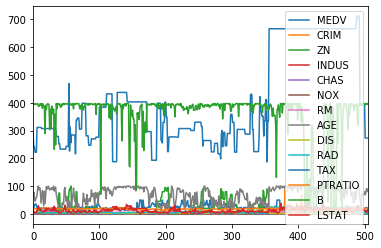

In [11]:
data[['MEDV','CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']].plot()

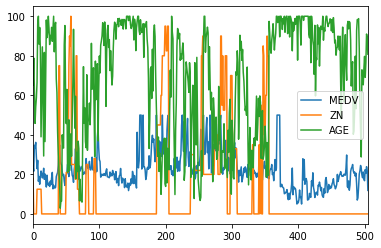

In [12]:
# Повышение AGE понижает целевой фактор
p_data = data[['MEDV', 'ZN', 'AGE']]
p_data.plot()

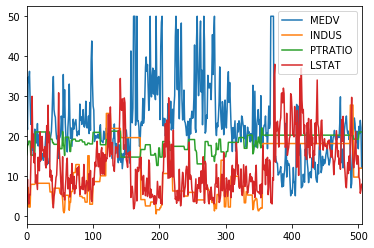

In [13]:
p_data = data[['MEDV','INDUS','PTRATIO','LSTAT']]
p_data.plot()

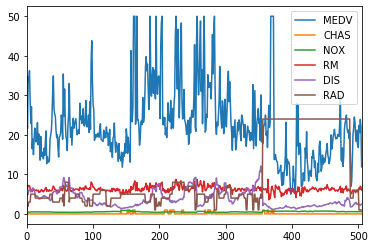

In [14]:
p_data = data[['MEDV','CHAS','NOX','RM','DIS','RAD']]
p_data.plot()

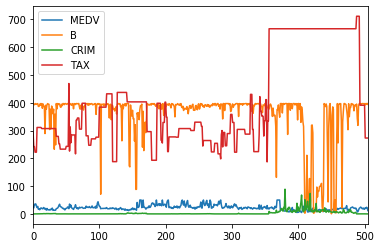

In [15]:
p_data = data[['MEDV','B','CRIM','TAX']]
p_data.plot()

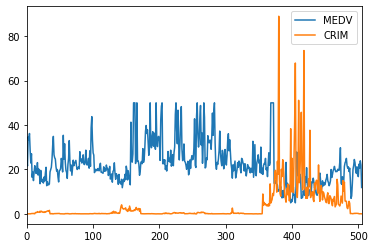

In [16]:
# очевидно криминальная активность понижает наш целевой фактор
data[['MEDV','CRIM']].plot()

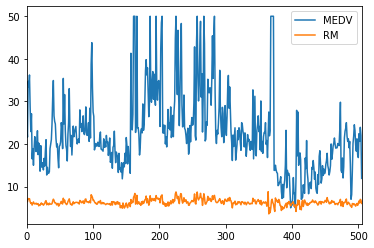

In [17]:
#  Влияние RM (среднее количество комнат в одном жилом помещении) на целевой фактор визуально оценить невозможно
p_data = data[['MEDV','RM']]
p_data.plot()

**Данные на этих графиках позволяют сделать следующие предварительные выводы:**
- на первом участке снижение ZN вызывает понижение целевого фактора MEDV;
- на втором участке некоторые факторы ('ZN','INDUS','CHAS','RAD','TAX','PTRATIO')  не меняются (похоже на аномалию) и, следовательно, на величину MEDV никак не влияют;
- повышение AGE понижает целевой фактор MEDV;
- криминальная активность понижает наш целевой фактор MEDV;
- влияние некоторых факторов на целевой фактор визуально оценить невозможно.

In [18]:
# узнаем сколько значений data['TAX'] >= 666, используя метод .shape
data[data['TAX'] >= 666].shape

(137, 14)

In [19]:
tax666 = data[data['TAX'] >= 666]
tax666.head(3)

CRIM    ZN  INDUS  CHAS   NOX    RM    AGE   DIS  RAD  TAX  PTRATIO  \
356 8.983 0.000 18.100     1 0.770 6.212 97.400 2.122   24  666   20.200   
357 3.850 0.000 18.100     1 0.770 6.395 91.000 2.505   24  666   20.200   
358 5.202 0.000 18.100     1 0.770 6.127 83.400 2.723   24  666   20.200   

          B  LSTAT   MEDV  
356 377.730 17.600 17.800  
357 391.340 13.270 21.700  
358 395.430 11.480 22.700

In [189]:
taxN666 = data[data['TAX'] < 666]
taxN666.head(3)

CRIM     ZN  INDUS  CHAS   NOX    RM    AGE   DIS  RAD  TAX  PTRATIO  \
0 0.006 18.000  2.310     0 0.538 6.575 65.200 4.090    1  296   15.300   
1 0.027  0.000  7.070     0 0.469 6.421 78.900 4.967    2  242   17.800   
2 0.027  0.000  7.070     0 0.469 7.185 61.100 4.967    2  242   17.800   

        B  LSTAT   MEDV  
0 396.900  4.980 24.000  
1 396.900  9.140 21.600  
2 392.830  4.030 34.700

**Посмотрим как отличаюстся статистические характеристики для этих двух наборов данных**

In [30]:
taxN666.describe(include='all').transpose()

count    mean    std     min     25%     50%     75%     max
CRIM    369.000   0.389  0.629   0.006   0.058   0.132   0.369   4.097
ZN      369.000  15.583 26.087   0.000   0.000   0.000  22.000 100.000
INDUS   369.000   8.421  6.004   0.460   4.000   6.410  10.010  25.650
CHAS    369.000   0.073  0.261   0.000   0.000   0.000   0.000   1.000
NOX     369.000   0.512  0.101   0.385   0.437   0.493   0.544   0.871
RM      369.000   6.388  0.671   4.903   5.933   6.245   6.727   8.725
AGE     369.000  60.632 28.218   2.900  35.900  62.200  88.000 100.000
DIS     369.000   4.441  2.098   1.322   2.715   4.052   5.874  12.127
RAD     369.000   4.455  1.643   1.000   4.000   4.000   5.000   8.000
TAX     369.000 311.927 67.828 187.000 270.000 304.000 384.000 469.000
PTRATIO 369.000  17.809  2.210  12.600  16.400  17.900  19.200  22.000
B       369.000 381.043 39.567  70.800 383.780 392.780 396.330 396.900
LSTAT   369.000  10.417  5.832   1.730   6.120   9.380  13.280  34.410
MEDV    369.000  24.857  8.344  11.800  19.400  22.800  28.500  50.000

In [21]:
tax666.describe(include='all').transpose()

count    mean     std     min     25%     50%     75%     max
CRIM    137.000  12.299  13.017   0.106   5.441   8.717  14.236  88.976
ZN      137.000   0.000   0.000   0.000   0.000   0.000   0.000   0.000
INDUS   137.000  18.452   1.814  18.100  18.100  18.100  18.100  27.740
CHAS    137.000   0.058   0.235   0.000   0.000   0.000   0.000   1.000
NOX     137.000   0.670   0.061   0.532   0.614   0.693   0.713   0.770
RM      137.000   6.006   0.713   3.561   5.683   6.152   6.411   8.780
AGE     137.000  89.968  12.470  40.300  86.100  94.500  98.800 100.000
DIS     137.000   2.054   0.608   1.130   1.589   1.927   2.368   4.098
RAD     137.000  23.270   3.764   4.000  24.000  24.000  24.000  24.000
TAX     137.000 667.642   8.469 666.000 666.000 666.000 666.000 711.000
PTRATIO 137.000  20.196   0.019  20.100  20.200  20.200  20.200  20.200
B       137.000 291.039 144.090   0.320 210.970 374.560 395.280 396.900
LSTAT   137.000  18.675   6.874   2.960  14.190  18.050  23.240  37.970
MEDV    137.000  16.272   8.459   5.000  11.000  14.300  19.900  50.000

**На втором участке можно не рассматривать неменяющиеся факторы ('ZN','INDUS','CHAS','RAD','TAX','PTRATIO'), а для построения модели можно рассмотреть следующие факторы - CRIM, NOX, RM, AGE, DIS, B, LSTAT.**

## Постороение модели для первого участка ##

In [199]:
# выбираем признаки по которым обучемся с указанием целевого признака
new_taxN666 = taxN666[['RM','PTRATIO', 'LSTAT','MEDV']]
new_taxN666.head(5)

RM  PTRATIO  LSTAT   MEDV
0 6.575   15.300  4.980 24.000
1 6.421   17.800  9.140 21.600
2 7.185   17.800  4.030 34.700
3 6.998   18.700  2.940 33.400
4 7.147   18.700  5.330 36.200

In [200]:
# отбираем признаки для x и y. Аргумент - это все значения кроме последнего. y - это последний столбец
# из дата фрейма выберем столбцы для построения модели :
X_columns = new_taxN666.columns[:-1]
y_column = new_taxN666.columns[-1]
X_columns,y_column

(Index(['RM', 'PTRATIO', 'LSTAT'], dtype='object'), 'MEDV')

In [201]:
# обозначим 
X = taxN666[X_columns]
y = taxN666[y_column]

In [202]:
# разделим наши данные на две части,
# чтобы проверить модель потом на независимой выборке (20% для тестирования выбрали случайно)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [203]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
estimator = LinearRegression()
estimator.fit(X_train, y_train) # обучение линейной модели регрессии
y_pred = estimator.predict(X_test) # получаем у (предсказанный) по нашей модели для test данных
print('коэф детерминации - R2: \t', r2_score(y_test, y_pred))
print('СКО MEDV: \t', round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
print('абсолютная ошибка MAE: \t', round(mean_absolute_error(y_test, y_pred),2))

коэф детерминации - R2: 	 0.8628446040934501
СКО MEDV: 	 3.14
абсолютная ошибка MAE: 	 2.48


In [204]:
# чтобы понимать, посмотрим среднее значение самой y
print('y_test среднее=',y_test.mean())
print('y_pred среднее=',y_pred.mean())
# относительные ошибки
print('СКО MEDV (в процентах) =',100*np.sqrt(mean_squared_error(y_test, y_pred))/y_test.mean())
print('относительная ошибка (в процентах) =', 100*mean_absolute_error(y_test, y_pred)/y_test.mean())

y_test среднее= 25.127027027027015
y_pred среднее= 25.622049410294945
СКО MEDV (в процентах) = 12.48698242987114
относительная ошибка (в процентах) = 9.877584264908858


In [205]:
# коэффициенты модели
estimator.coef_

array([ 9.53875329, -0.69100102, -0.12744184])

In [206]:
estimator.intercept_

-22.343348933663087

## Рабочие эксперименты для первого участка: ##

**'RM','LSTAT'**
- коэф детерминации - R2: 	 0.8374765477999251
- СКО MEDV: 	 3.42
- абсолютная ошибка MAE: 	 2.72
- y_test среднее= 25.127027027027015
- y_pred среднее= 25.403108778797595
- СКО MEDV (в процентах) = 13.592804508821525
- относительная ошибка (в процентах) = 10.807225445945667

**'RM', 'PTRATIO', 'LSTAT'**
- коэф детерминации - R2: 	 0.8628446040934501
- СКО MEDV: 	 3.14
- абсолютная ошибка MAE: 	 2.48
- y_test среднее= 25.127027027027015
- y_pred среднее= 25.622049410294945
- СКО MEDV (в процентах) = 12.48698242987114
- относительная ошибка (в процентах) = 9.877584264908858

**'INDUS','RM','PTRATIO','LSTAT'**
- коэф детерминации - R2: 	 0.857782133806762
- СКО MEDV: 	 3.19
- абсолютная ошибка MAE: 	 2.55
- y_test среднее= 25.127027027027015
- y_pred среднее= 25.587515446282733
- СКО MEDV (в процентах) = 12.71534448857357
- относительная ошибка (в процентах) = 10.133004976544518

**'INDUS','RM','AGE', 'PTRATIO','LSTAT'**
- коэф детерминации - R2: 	 0.8568495500336111
- СКО MEDV: 	 3.21
- абсолютная ошибка MAE: 	 2.57
- y_test среднее= 25.127027027027015
- y_pred среднее= 25.554824320406038
- СКО MEDV (в процентах) = 12.756966360804876
- относительная ошибка (в процентах) = 10.210694285942491

**'INDUS','RM','TAX','PTRATIO','LSTAT'**
- коэф детерминации - R2: 	 0.8673516071075256
- СКО MEDV: 	 3.09
- абсолютная ошибка MAE: 	 2.42
- y_test среднее= 25.127027027027015
- y_pred среднее= 25.498873438758782
- СКО MEDV (в процентах) = 12.280104086204425
- относительная ошибка (в процентах) = 9.650592671580815

**'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT'**
- коэф детерминации - R2: 	 0.8852617737887234
- СКО MEDV: 	 2.87
- абсолютная ошибка MAE: 	 2.24
- y_test среднее= 25.127027027027015
- y_pred среднее= 25.40590026064275
- СКО MEDV (в процентах) = 11.42102592638749
- относительная ошибка (в процентах) = 8.90188715774798
----Коэффициенты модели----
- 'CRIM': 1.50851299e+00 (наибольшее положительное влияние - не верно по смыслу!!!)
- 'ZN' : 1.96934022e-02
- 'INDUS': 1.73123365e-02
- 'CHAS':   9.03423321e-01
- 'NOX' : -9.26468999e+00 (наибольшее отрицательное влияние)
- 'RM' : 9.41753113e+00
- 'AGE' : -5.54962915e-02
- 'DIS'  : -9.12633089e-01
- 'RAD' : 2.36951283e-01
- 'TAX' : -1.39503154e-02
- 'PTRATIO' : -6.01283831e-01
- 'B': 1.77141503e-02
- 'LSTAT': -6.88571766e-03
- свободный член модели: -16.865073837738464

**Убрали 'CRIM' - модель стала точнее 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT'**
- коэф детерминации - R2: 	 0.8872797942340236
- СКО MEDV: 	 2.84
- абсолютная ошибка MAE: 	 2.22
- y_test среднее= 25.127027027027015
- y_pred среднее= 25.45990069500015
- СКО MEDV (в процентах) = 11.320143651168111
- относительная ошибка (в процентах) = 8.84624174380058

**Модель, построенная на тех же столбцах, что и для второго участка: 'CRIM', 'RM', 'AGE', 'B', 'LSTAT'**
- коэф детерминации - R2: 	 0.8308896896063359
- СКО MEDV: 	 3.48
- абсолютная ошибка MAE: 	 2.79
- y_test среднее= 25.127027027027015
- y_pred среднее= 25.401147508137853
- СКО MEDV (в процентах) = 13.865517870768652
- относительная ошибка (в процентах) = 11.107158896686007

----Коэффициенты модели----
- 'CRIM' = 1.90547355e+00
- 'RM'   = 1.08560910e+01 (наибольшее положительное влияние: чем больше RM, тем выше MEDV)
- 'AGE'  = -4.57888568e-02 (наибольшее отрицательное влияние: чем больше AGE, тем меньше MEDV)
- 'B'    = 2.13698546e-02
- 'LSTAT'= -2.75889293e-03
- свободный член =  -50.5

## Лучшая модель для первого участка ##

**'RM', 'PTRATIO', 'LSTAT'- (коэффициент детерминации R2: 0.86)**
- коэф детерминации - R2: 	 0.8628446040934501
- СКО MEDV: 	 3.14
- абсолютная ошибка MAE: 	 2.48
- y_test среднее= 25.127027027027015
- y_pred среднее= 25.622049410294945
- СКО MEDV (в процентах) = 12.48698242987114
- относительная ошибка (в процентах) = 9.877584264908858

----Коэффициенты модели----
- 'RM' : 9.53875329
- 'PTRATIO' : -0.69100102
- 'LSTAT': -0.12744184
- свободный член модели: -22.3

## Постороение модели для второго участка ##

In [140]:
# выбираем признаки по которым обучемся с указанием целевого признака
new_tax666 = tax666[['CRIM', 'CHAS', 'LSTAT','MEDV']]
new_tax666.head(5)

CRIM  CHAS  LSTAT   MEDV
356 8.983     1 17.600 17.800
357 3.850     1 13.270 21.700
358 5.202     1 11.480 22.700
359 4.261     0 12.670 22.600
360 4.542     0  7.790 25.000

In [141]:
# отбираем признаки для x и y. Аргумент - это все значения кроме последнего. y - это последний столбец
# из дата фрейма выберем столбцы для построения модели :
X_columns = new_tax666.columns[:-1]
y_column = new_tax666.columns[-1]
X_columns,y_column

(Index(['CRIM', 'CHAS', 'LSTAT'], dtype='object'), 'MEDV')

In [142]:
# обозначим 
X = tax666[X_columns]
y = tax666[y_column]

In [143]:
# разделим наши данные на две части,
# чтобы проверить модель потом на независимой выборке (20% для тестирования выбрали случайно)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
estimator = LinearRegression()
estimator.fit(X_train, y_train) # обучение линейной модели регрессии
y_pred = estimator.predict(X_test) # получаем у (предсказанный) по нашей модели для test данных
print('коэф детерминации - на сколько хороша наша модель R2: \t', r2_score(y_test, y_pred))
print('СКО MEDV: \t', round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
print('абсолютная ошибка MAE: \t', round(mean_absolute_error(y_test, y_pred),2))

коэф детерминации - на сколько хороша наша модель R2: 	 -1.0330413185589276
СКО MEDV: 	 7.34
абсолютная ошибка MAE: 	 4.55


## Рабочие эксперименты для второго участка: ##

**'LSTAT'**
- коэф детерминации - на сколько хороша наша модель R2: 	 0.40182351393309834
- СКО MEDV: 	 3.98
- абсолютная ошибка MAE: 	 2.98

**'CRIM', 'LSTAT'**
- коэф детерминации - на сколько хороша наша модель R2: 	 0.5025050019454054
- СКО MEDV: 	 3.63
- абсолютная ошибка MAE: 	 2.76

**'CRIM','AGE','LSTAT'**
- коэф детерминации - на сколько хороша наша модель R2: 	 0.5322797693425607
- СКО MEDV: 	 3.52
- абсолютная ошибка MAE: 	 2.75

**'CRIM','AGE','DIS','LSTAT'**
- коэф детерминации - на сколько хороша наша модель R2: 	 0.3640201663577063
- СКО MEDV: 	 4.11
- абсолютная ошибка MAE: 	 2.92

**'CRIM','NOX','AGE','DIS','LSTAT'**
- коэф детерминации - на сколько хороша наша модель R2: 	 0.20728168619522824
- СКО MEDV: 	 4.59
- абсолютная ошибка MAE: 	 3.65

**'CRIM', 'NOX', 'RM', 'AGE', 'DIS', 'LSTAT'**
- коэф детерминации - на сколько хороша наша модель R2: 	 0.2554287298023926
- СКО MEDV: 	 4.44
- абсолютная ошибка MAE: 	 3.52

**'CRIM', 'RM', 'AGE', 'LSTAT'**
- коэф детерминации - на сколько хороша наша модель R2: 	 0.610277646894353
- СКО MEDV: 	 3.22
- абсолютная ошибка MAE: 	 2.45

**'CRIM', 'RM', 'AGE', 'B', 'LSTAT'**
- коэф детерминации - на сколько хороша наша модель R2: 	 0.6353520995509019
- СКО MEDV: 	 3.11
- абсолютная ошибка MAE: 	 2.4
- y_test среднее= 15.578571428571427
- y_pred среднее= 16.79376980748655
- СКО MEDV в процентах = 19.96763859411081
- относительная ошибка в процентах = 15.396124617695243

## Лучшая модель для второго участка ##

**Наилучшую модель для второго участка удалось получить, используя факторы: 'CRIM', 'RM', 'AGE', 'B', 'LSTAT'. (коэффициент детерминации R2: 0.635)**

**Коэффициенты модели:**
- 'CRIM' = -0.09827149
- 'RM'   = -2.04907654 
- 'AGE'  =  0.08546174 
- 'B'    = 0.00218203
- 'LSTAT'= -0.95246341
- свободный член =  39.5

In [27]:
# чтобы понимать, посмотрим среднее значение самой y
print('y_test среднее=',y_test.mean())
print('y_pred среднее=',y_pred.mean())
# относительные ошибки
print('СКО MEDV (в процентах) =',100*np.sqrt(mean_squared_error(y_test, y_pred))/y_test.mean())
print('относительная ошибка (в процентах) =', 100*mean_absolute_error(y_test, y_pred)/y_test.mean())

y_test среднее= 15.578571428571427
y_pred среднее= 16.79376980748655
СКО MEDV (в процентах) = 19.96763859411081
относительная ошибка (в процентах) = 15.396124617695243


In [28]:
# коэффициенты модели
estimator.coef_

array([-0.09827149, -2.04907654,  0.08546174,  0.00218203, -0.95246341])

In [29]:
estimator.intercept_

39.49940398472596

In [ ]:
taxN666.describe(include='all').transpose()

# Оцениваем основные статистические характеристики данных 

In [32]:
# основные статистические характеристики данных с учетом всех типов данных include='all'
data.describe(include='all').transpose()

count    mean     std     min     25%     50%     75%     max
CRIM    506.000   3.614   8.602   0.006   0.082   0.257   3.677  88.976
ZN      506.000  11.364  23.322   0.000   0.000   0.000  12.500 100.000
INDUS   506.000  11.137   6.860   0.460   5.190   9.690  18.100  27.740
CHAS    506.000   0.069   0.254   0.000   0.000   0.000   0.000   1.000
NOX     506.000   0.555   0.116   0.385   0.449   0.538   0.624   0.871
RM      506.000   6.285   0.703   3.561   5.886   6.208   6.623   8.780
AGE     506.000  68.575  28.149   2.900  45.025  77.500  94.075 100.000
DIS     506.000   3.795   2.106   1.130   2.100   3.207   5.188  12.127
RAD     506.000   9.549   8.707   1.000   4.000   5.000  24.000  24.000
TAX     506.000 408.237 168.537 187.000 279.000 330.000 666.000 711.000
PTRATIO 506.000  18.456   2.165  12.600  17.400  19.050  20.200  22.000
B       506.000 356.674  91.295   0.320 375.377 391.440 396.225 396.900
LSTAT   506.000  12.653   7.141   1.730   6.950  11.360  16.955  37.970
MEDV    506.000  22.533   9.197   5.000  17.025  21.200  25.000  50.000

**Просомотри выбросы значений MEDV и возможную связь с CHAS.**

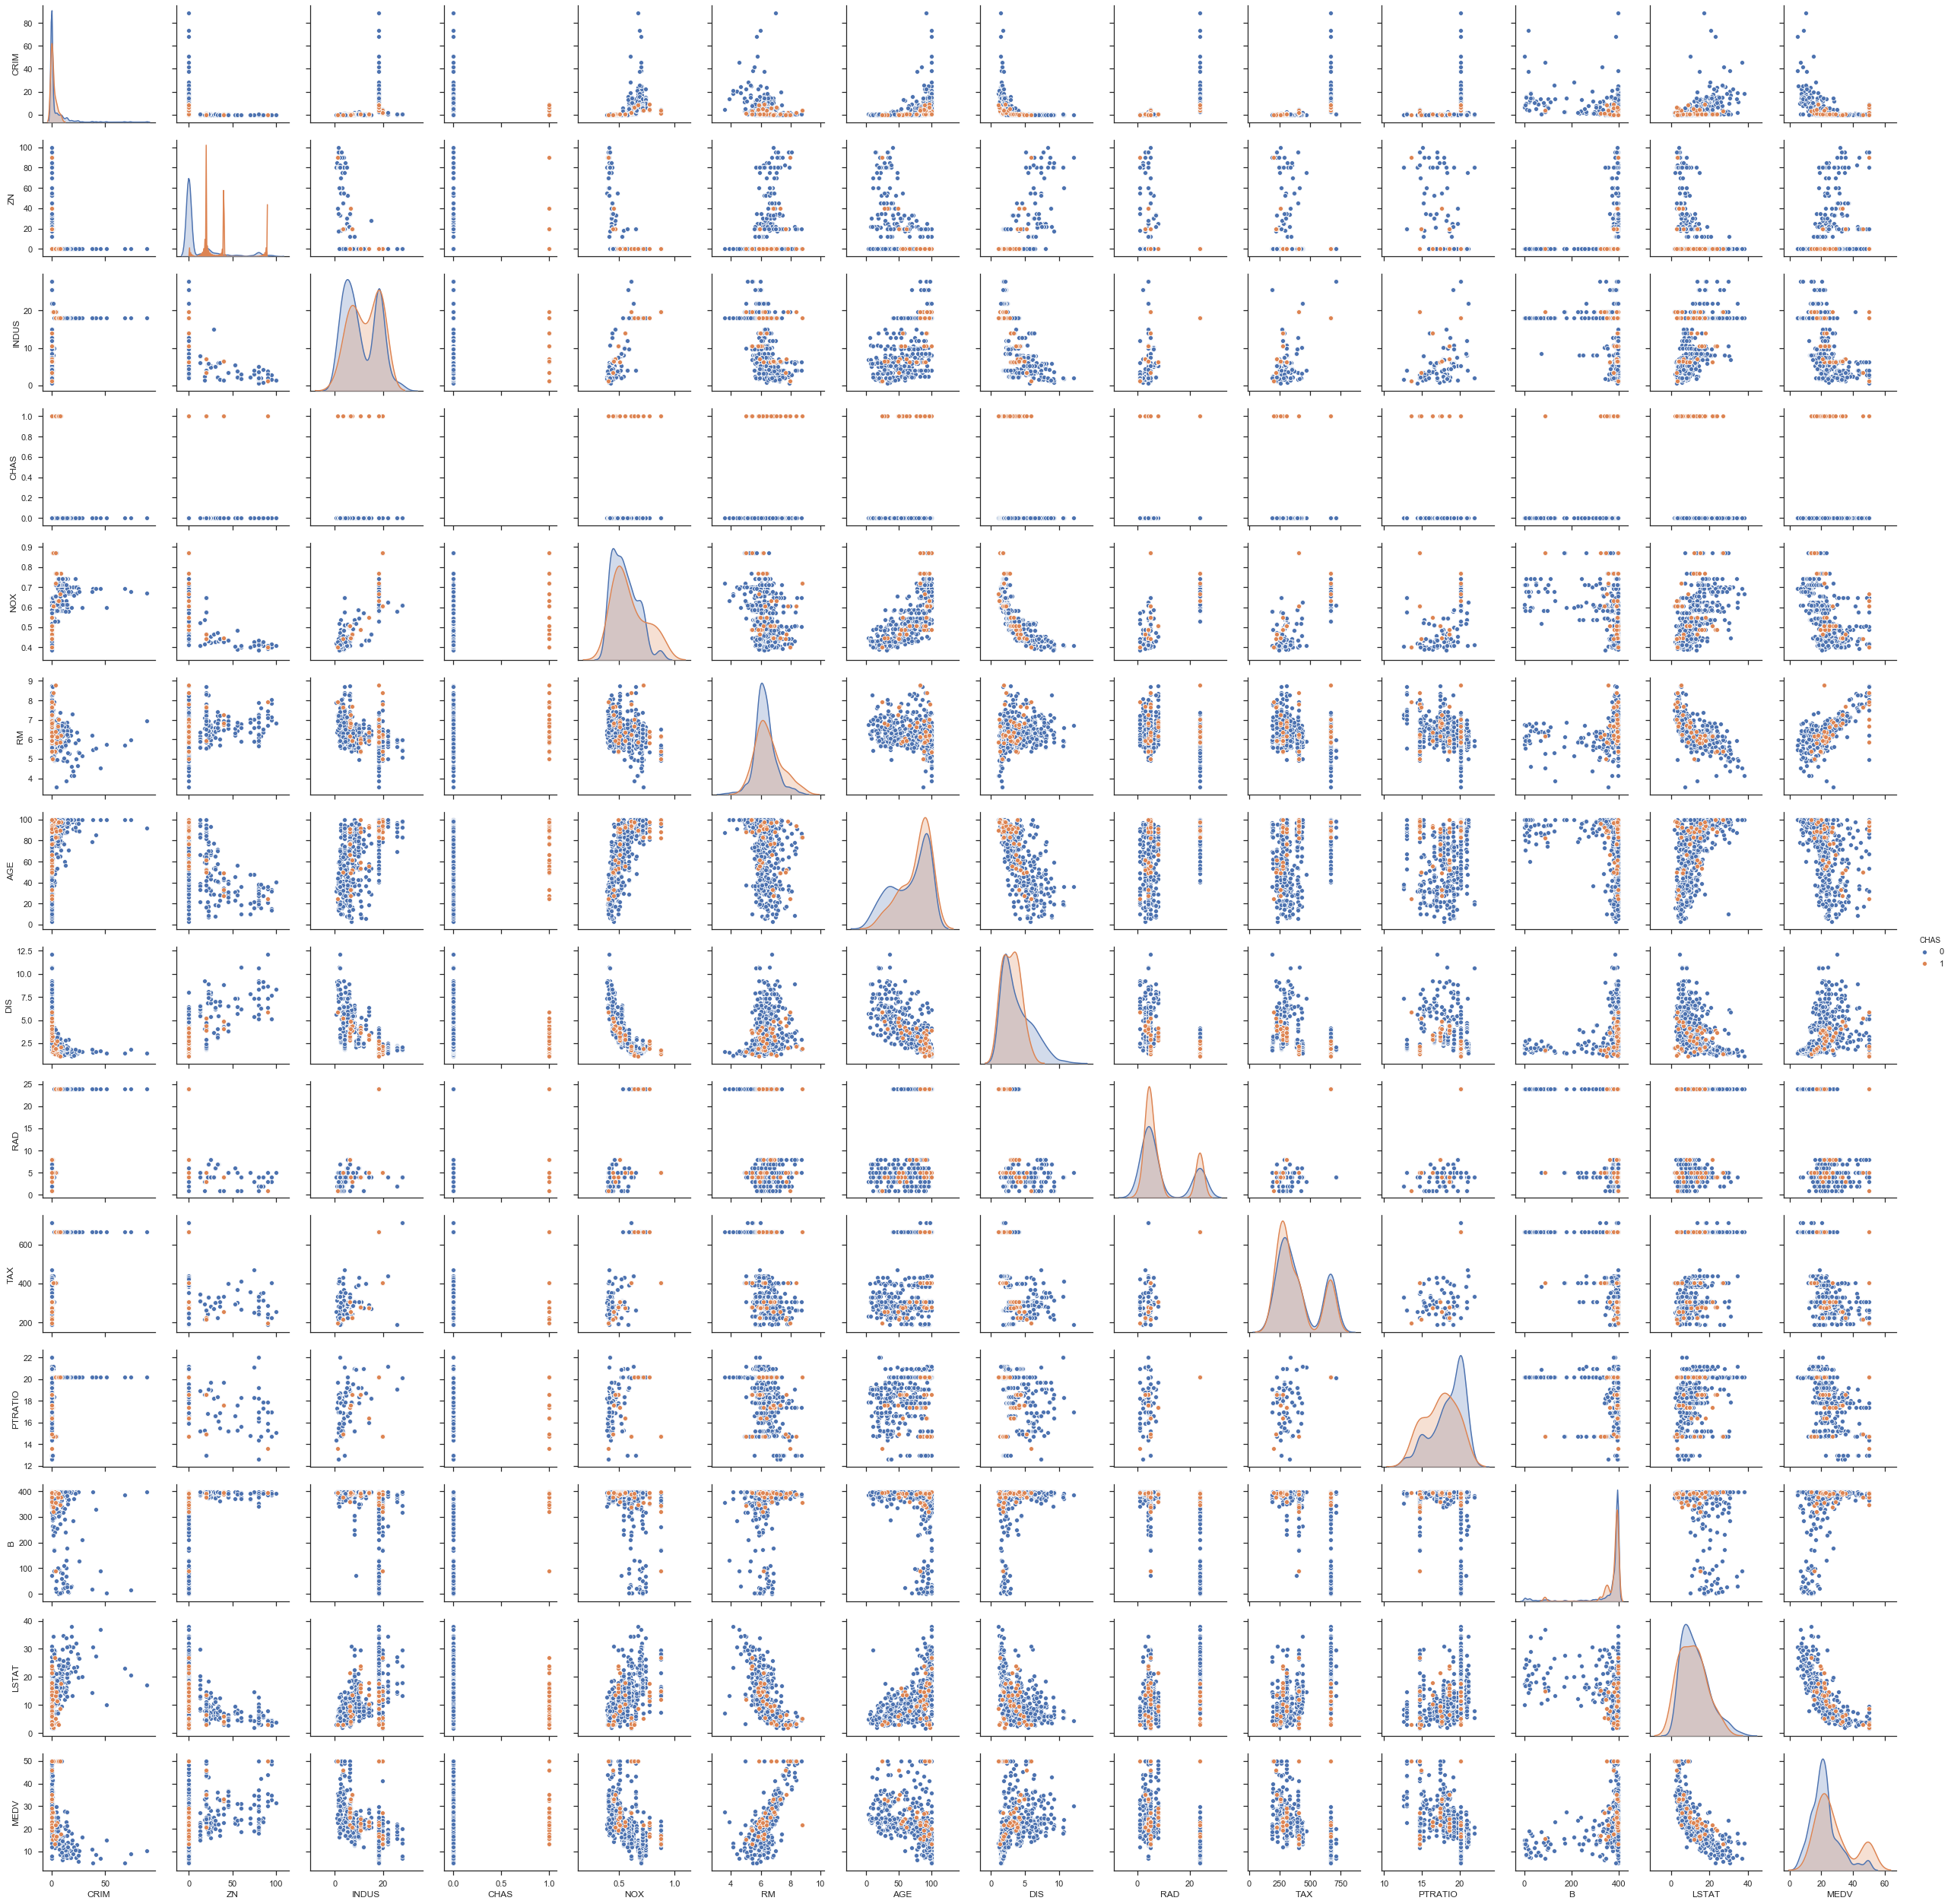

In [77]:
fig = sns.pairplot(data=data, hue='CHAS')
plt.show()

**Графики распределений существенно не зависят от CHAS. Cтроить модели для каждого значения CHAS отдельно нецелесообразно**

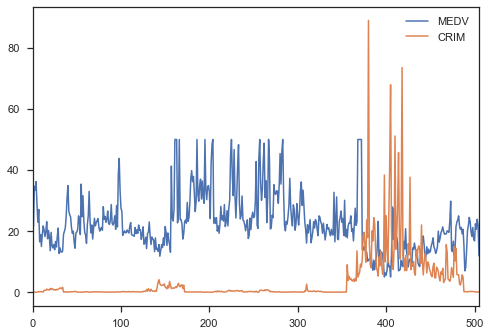

In [101]:
# при повышении уровня преступности на душу населения цена на недвижимость падает
# при уменьшении уровня преступности цена на недвижимость восстанавливается
p_data = data[['MEDV','CRIM']]
p_data.plot()

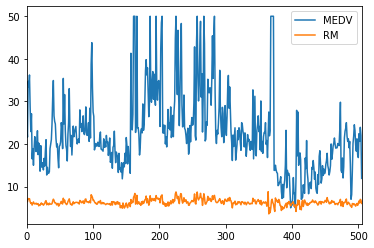

In [181]:
# здесь возможная взаимосвязь неочевидна
p_data = data[['MEDV','RM']]
p_data.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2965ba90>,
      dtype=object)

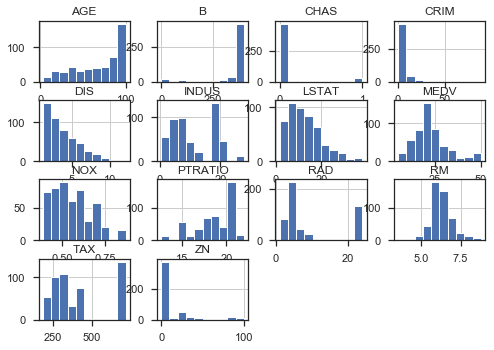

In [55]:
# посмотрим плотности распределения подозрительных признаков - гистограммы
data[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']].hist()

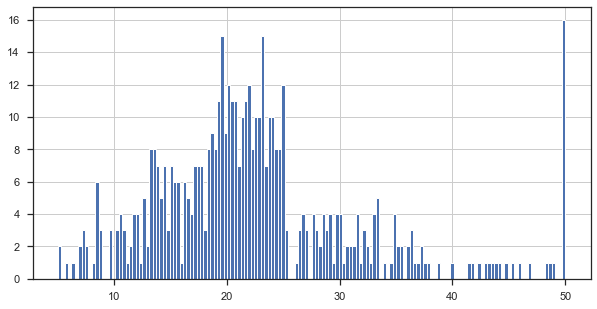

In [80]:
# увеличили поле графика в надежде увидеть аномалию. 
data['MEDV'].hist(bins=150, figsize=(10,5))

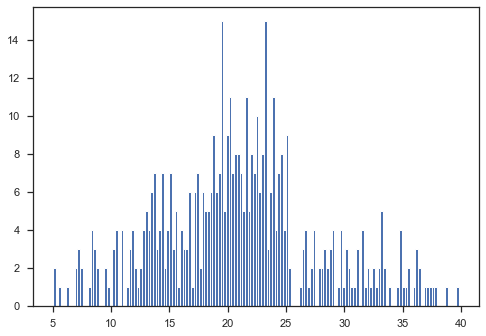

In [82]:
#
# предположим аномалию - все после 40
plt.hist(data.loc[data['MEDV'] < 40,'MEDV'], bins=150)
# plt.xscale('log')
plt.show()

In [95]:
# отсеим и посмотрим
medv_data = data[data['MEDV'] < 35]

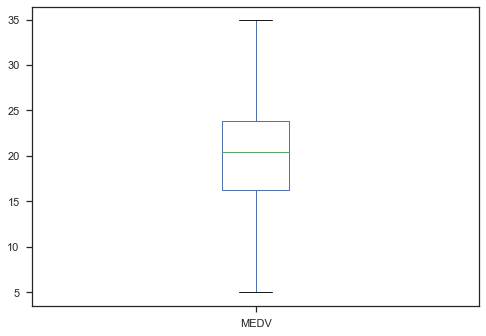

In [96]:
medv_data['MEDV'].plot(kind='box')

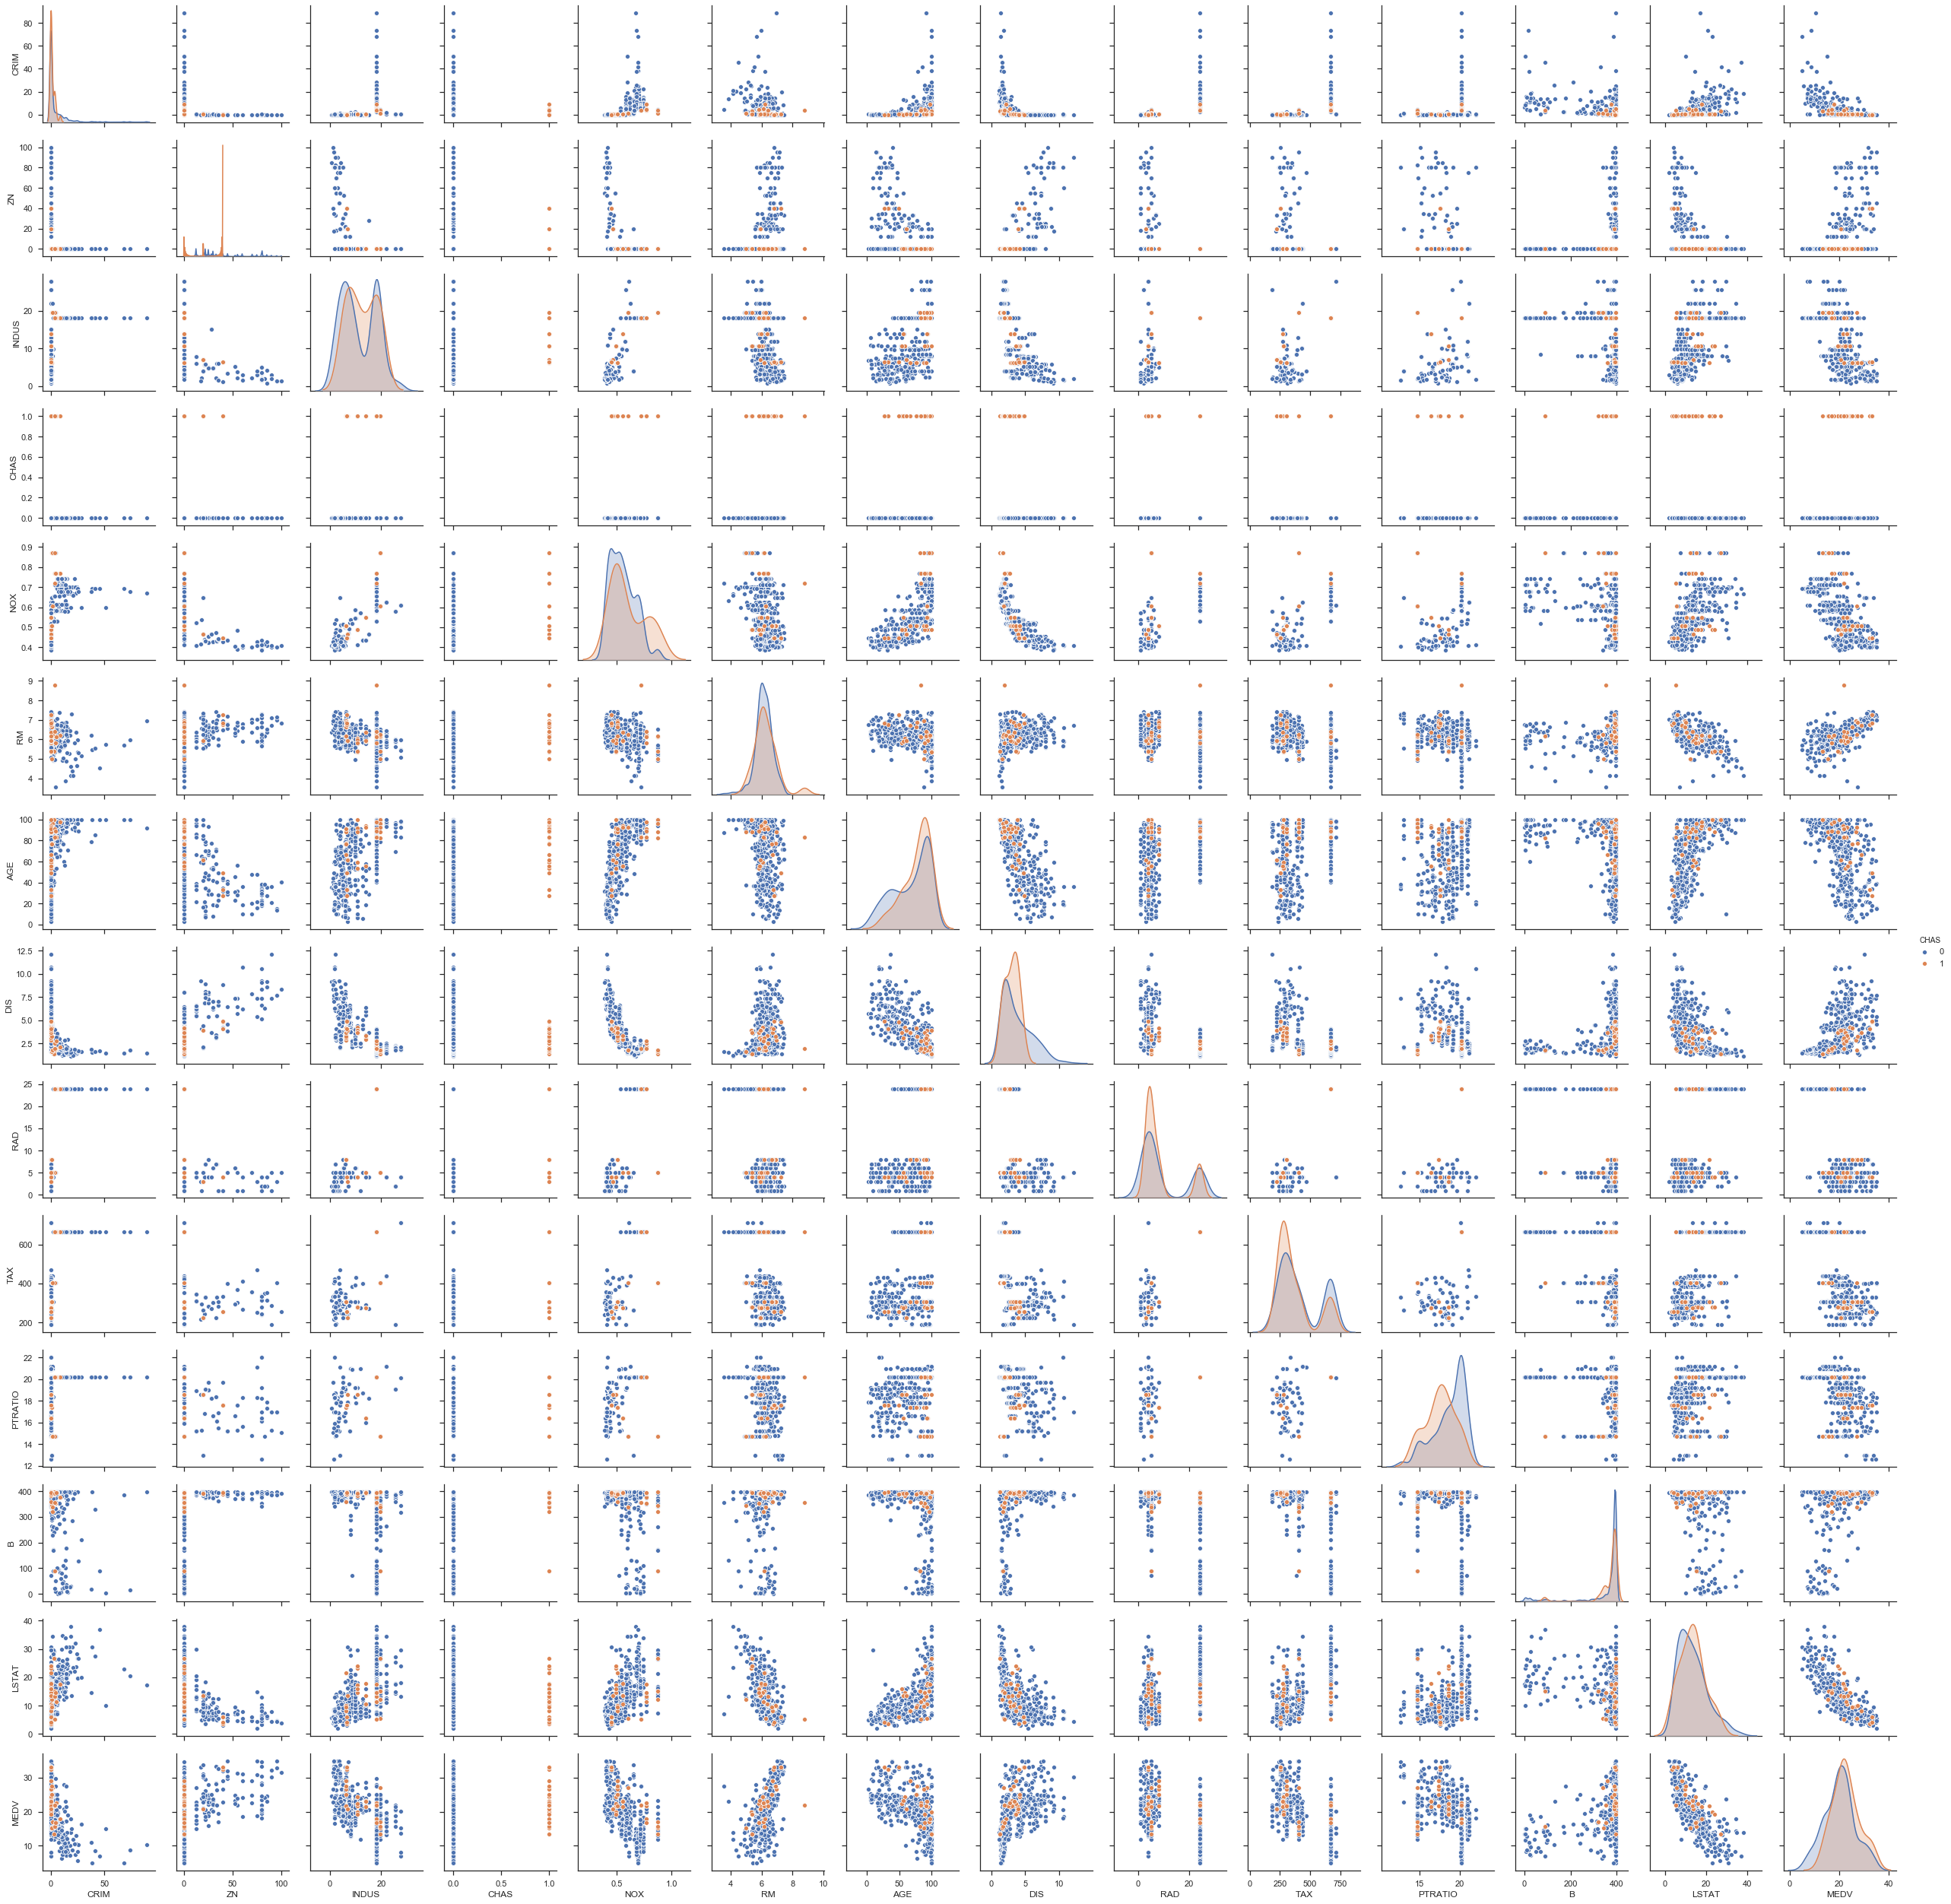

In [97]:
fig = sns.pairplot(data=medv_data, hue='CHAS')
plt.show()

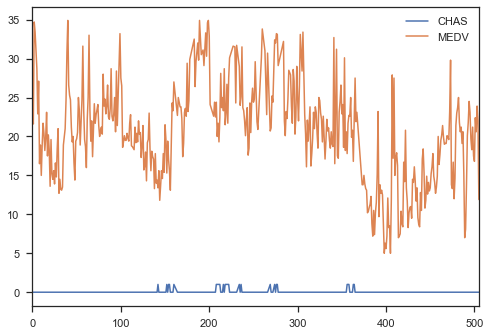

In [91]:
p_data = medv_data[['CHAS','MEDV']]
p_data.plot()

**Potly можно построить и box plot. Рассмотрим различия оценок MEDV в зависимости от факторорв.**

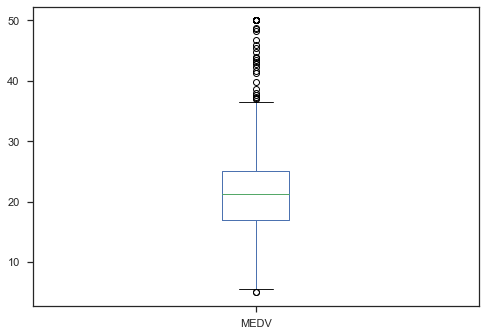

In [53]:
data['MEDV'].plot(kind='box')

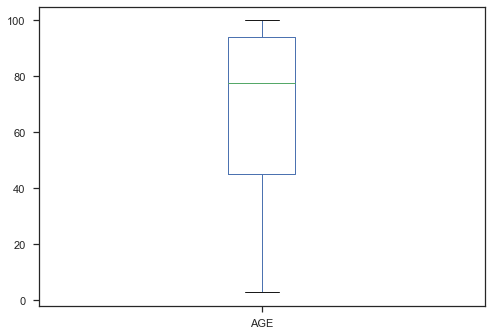

In [69]:
data['AGE'].plot(kind='box')

# Попарные графики для выборок, а также частотные графики на главной диагонали с помощью метода pairplot

In [44]:
#sns.set(style="ticks", color_codes=True)
#g = sns.pairplot(data)

# Оценка корреляционной матрицы данных

In [33]:
# оценка корреляционной матрицы данных
data.corr()

CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
CRIM     1.000 -0.200  0.407 -0.056  0.421 -0.219  0.353 -0.380  0.626  0.583   
ZN      -0.200  1.000 -0.534 -0.043 -0.517  0.312 -0.570  0.664 -0.312 -0.315   
INDUS    0.407 -0.534  1.000  0.063  0.764 -0.392  0.645 -0.708  0.595  0.721   
CHAS    -0.056 -0.043  0.063  1.000  0.091  0.091  0.087 -0.099 -0.007 -0.036   
NOX      0.421 -0.517  0.764  0.091  1.000 -0.302  0.731 -0.769  0.611  0.668   
RM      -0.219  0.312 -0.392  0.091 -0.302  1.000 -0.240  0.205 -0.210 -0.292   
AGE      0.353 -0.570  0.645  0.087  0.731 -0.240  1.000 -0.748  0.456  0.506   
DIS     -0.380  0.664 -0.708 -0.099 -0.769  0.205 -0.748  1.000 -0.495 -0.534   
RAD      0.626 -0.312  0.595 -0.007  0.611 -0.210  0.456 -0.495  1.000  0.910   
TAX      0.583 -0.315  0.721 -0.036  0.668 -0.292  0.506 -0.534  0.910  1.000   
PTRATIO  0.290 -0.392  0.383 -0.122  0.189 -0.356  0.262 -0.232  0.465  0.461   
B       -0.385  0.176 -0.357  0.049 -0.380  0.128 -0.274  0.292 -0.444 -0.442   
LSTAT    0.456 -0.413  0.604 -0.054  0.591 -0.614  0.602 -0.497  0.489  0.544   
MEDV    -0.388  0.360 -0.484  0.175 -0.427  0.695 -0.377  0.250 -0.382 -0.469   

         PTRATIO      B  LSTAT   MEDV  
CRIM       0.290 -0.385  0.456 -0.388  
ZN        -0.392  0.176 -0.413  0.360  
INDUS      0.383 -0.357  0.604 -0.484  
CHAS      -0.122  0.049 -0.054  0.175  
NOX        0.189 -0.380  0.591 -0.427  
RM        -0.356  0.128 -0.614  0.695  
AGE        0.262 -0.274  0.602 -0.377  
DIS       -0.232  0.292 -0.497  0.250  
RAD        0.465 -0.444  0.489 -0.382  
TAX        0.461 -0.442  0.544 -0.469  
PTRATIO    1.000 -0.177  0.374 -0.508  
B         -0.177  1.000 -0.366  0.333  
LSTAT      0.374 -0.366  1.000 -0.738  
MEDV      -0.508  0.333 -0.738  1.000

In [98]:
# оценка корреляционной матрицы данных первого участка 
taxN666.corr()

CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
CRIM     1.000 -0.293  0.551  0.134  0.757 -0.221  0.479 -0.457  0.145  0.388   
ZN      -0.293  1.000 -0.477 -0.060 -0.472  0.309 -0.528  0.634 -0.171 -0.108   
INDUS    0.551 -0.477  1.000  0.127  0.675 -0.371  0.534 -0.596  0.007  0.416   
CHAS     0.134 -0.060  0.127  1.000  0.126  0.044  0.128 -0.143  0.087 -0.035   
NOX      0.757 -0.472  0.675  0.126  1.000 -0.264  0.667 -0.712  0.130  0.387   
RM      -0.221  0.309 -0.371  0.044 -0.264  1.000 -0.163  0.089  0.067 -0.227   
AGE      0.479 -0.528  0.534  0.128  0.667 -0.163  1.000 -0.672  0.101  0.241   
DIS     -0.457  0.634 -0.596 -0.143 -0.712  0.089 -0.672  1.000 -0.087 -0.208   
RAD      0.145 -0.171  0.007  0.087  0.130  0.067  0.101 -0.087  1.000  0.250   
TAX      0.388 -0.108  0.416 -0.035  0.387 -0.227  0.241 -0.208  0.250  1.000   
PTRATIO -0.235 -0.296  0.100 -0.143 -0.168 -0.334  0.046  0.020 -0.054  0.002   
B       -0.523  0.128 -0.303 -0.058 -0.411  0.155 -0.221  0.203 -0.060 -0.255   
LSTAT    0.403 -0.391  0.510  0.061  0.492 -0.678  0.540 -0.348  0.005  0.252   
MEDV    -0.182  0.321 -0.360  0.092 -0.250  0.889 -0.251  0.049  0.071 -0.292   

         PTRATIO      B  LSTAT   MEDV  
CRIM      -0.235 -0.523  0.403 -0.182  
ZN        -0.296  0.128 -0.391  0.321  
INDUS      0.100 -0.303  0.510 -0.360  
CHAS      -0.143 -0.058  0.061  0.092  
NOX       -0.168 -0.411  0.492 -0.250  
RM        -0.334  0.155 -0.678  0.889  
AGE        0.046 -0.221  0.540 -0.251  
DIS        0.020  0.203 -0.348  0.049  
RAD       -0.054 -0.060  0.005  0.071  
TAX        0.002 -0.255  0.252 -0.292  
PTRATIO    1.000  0.118  0.201 -0.451  
B          0.118  1.000 -0.220  0.191  
LSTAT      0.201 -0.220  1.000 -0.661  
MEDV      -0.451  0.191 -0.661  1.000

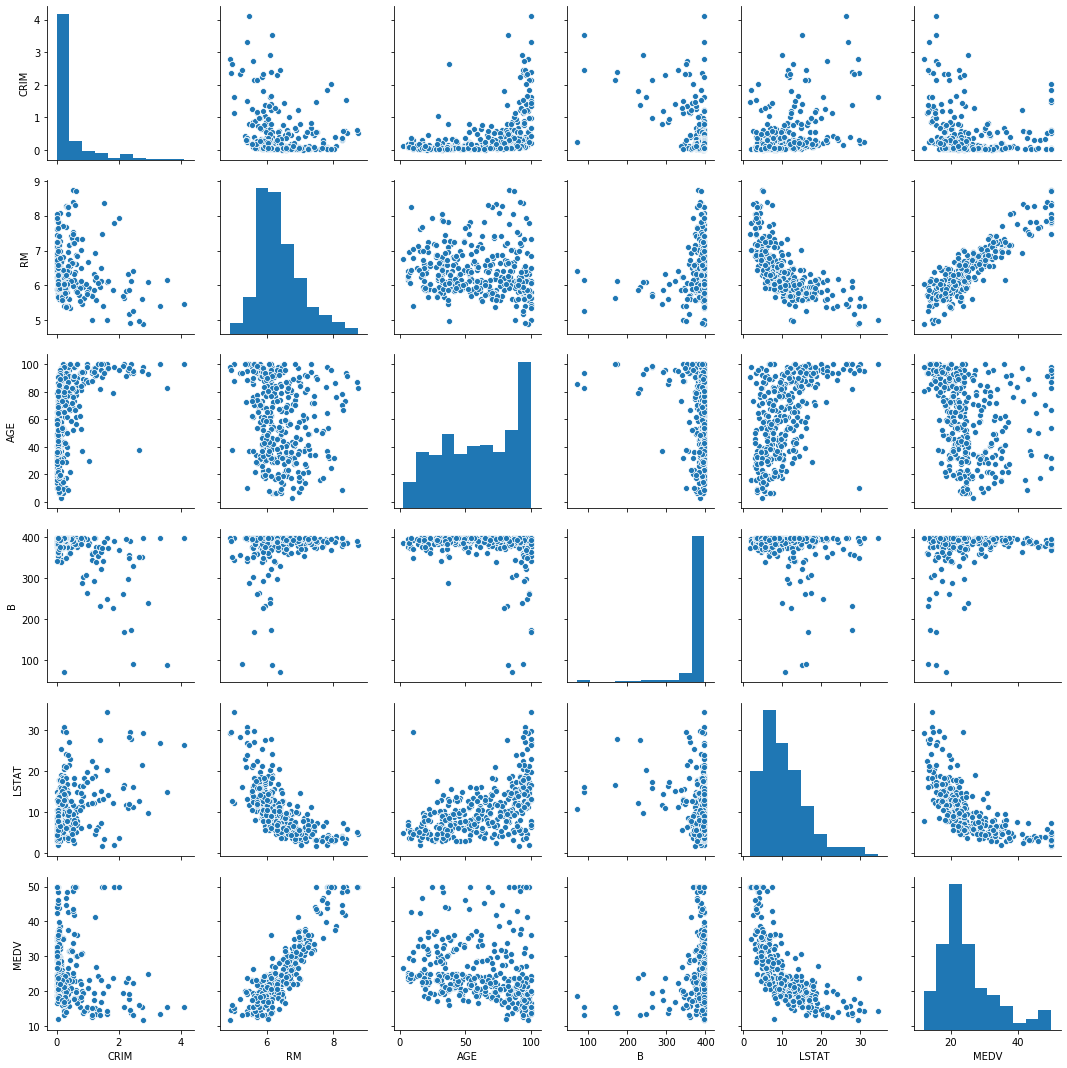

In [173]:
# отдельно посмотрим данные для первого  участка taxN666
sns.pairplot(taxN666[['CRIM', 'RM', 'AGE', 'B', 'LSTAT','MEDV']])

**На первом участке данные'RM', 'AGE' обнаруживают линейную связь с 'MEDV', данные 'LSTAT'- нелинейную.**

In [139]:
# оценка корреляционной матрицы данных второго участка 
tax666.corr()

CRIM  ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
CRIM     1.000 nan -0.182 -0.125  0.054 -0.143  0.231 -0.382  0.182 -0.182   
ZN         nan nan    nan    nan    nan    nan    nan    nan    nan    nan   
INDUS   -0.182 nan  1.000 -0.048 -0.196 -0.115  0.067 -0.058 -1.000  1.000   
CHAS    -0.125 nan -0.048  1.000  0.188  0.212  0.020 -0.082  0.048 -0.048   
NOX      0.054 nan -0.196  0.188  1.000  0.034  0.383 -0.278  0.196 -0.196   
RM      -0.143 nan -0.115  0.212  0.034  1.000 -0.121  0.278  0.115 -0.115   
AGE      0.231 nan  0.067  0.020  0.383 -0.121  1.000 -0.718 -0.067  0.067   
DIS     -0.382 nan -0.058 -0.082 -0.278  0.278 -0.718  1.000  0.058 -0.058   
RAD      0.182 nan -1.000  0.048  0.196  0.115 -0.067  0.058  1.000 -1.000   
TAX     -0.182 nan  1.000 -0.048 -0.196 -0.115  0.067 -0.058 -1.000  1.000   
PTRATIO  0.182 nan -1.000  0.048  0.196  0.115 -0.067  0.058  1.000 -1.000   
B       -0.160 nan  0.106  0.143 -0.001 -0.057 -0.001  0.054 -0.106  0.106   
LSTAT    0.309 nan  0.055 -0.325  0.165 -0.397  0.364 -0.417 -0.055  0.055   
MEDV    -0.330 nan -0.080  0.446 -0.234  0.134 -0.167  0.113  0.080 -0.080   

         PTRATIO      B  LSTAT   MEDV  
CRIM       0.182 -0.160  0.309 -0.330  
ZN           nan    nan    nan    nan  
INDUS     -1.000  0.106  0.055 -0.080  
CHAS       0.048  0.143 -0.325  0.446  
NOX        0.196 -0.001  0.165 -0.234  
RM         0.115 -0.057 -0.397  0.134  
AGE       -0.067 -0.001  0.364 -0.167  
DIS        0.058  0.054 -0.417  0.113  
RAD        1.000 -0.106 -0.055  0.080  
TAX       -1.000  0.106  0.055 -0.080  
PTRATIO    1.000 -0.106 -0.055  0.080  
B         -0.106  1.000 -0.205  0.247  
LSTAT     -0.055 -0.205  1.000 -0.702  
MEDV       0.080  0.247 -0.702  1.000

In [177]:
# отсеим и посмотрим
dat_2 = tax666[tax666['MEDV'] < 35]

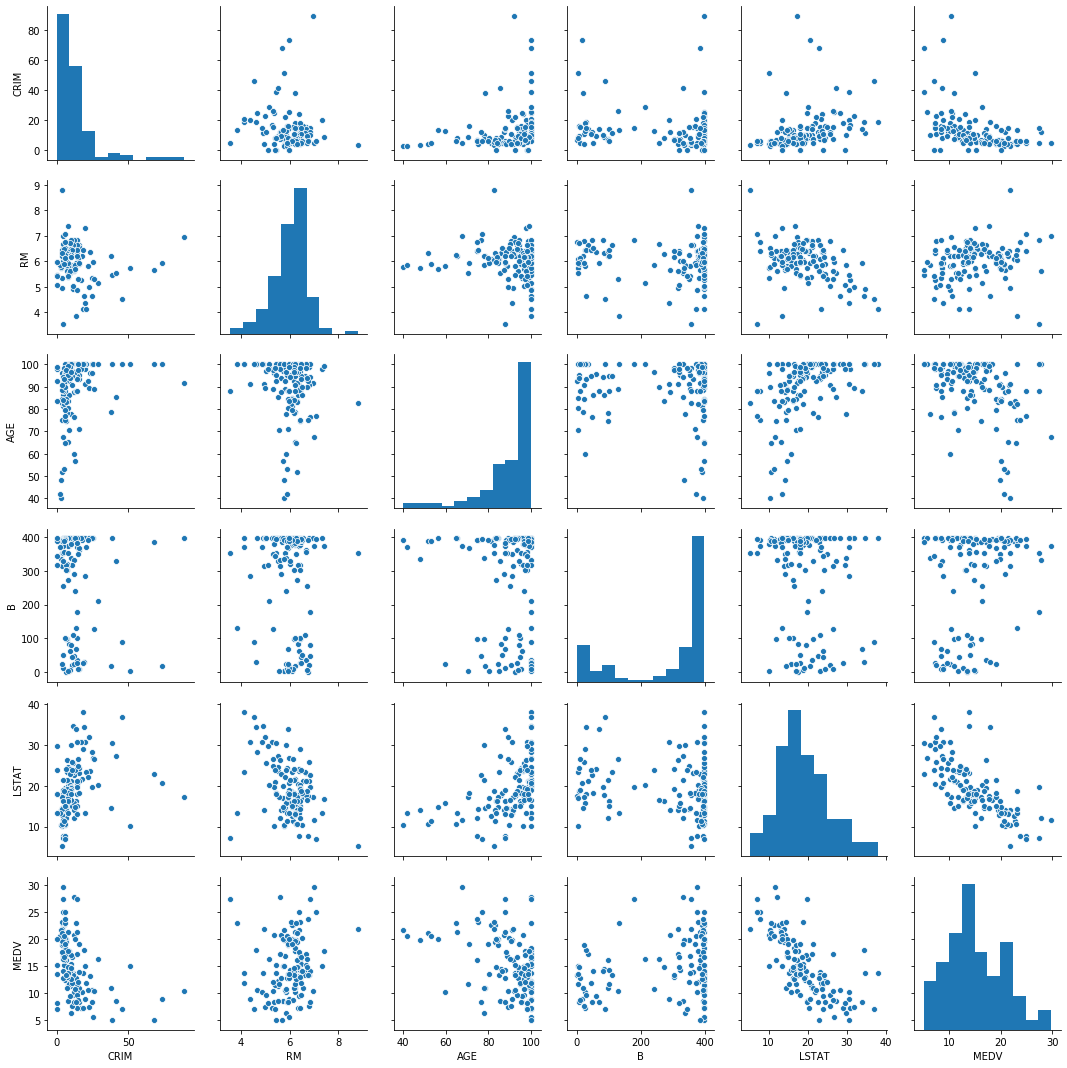

In [180]:
# отдельно посмотрим данные для второго участка tax666
sns.pairplot(dat_2[['CRIM', 'RM', 'AGE', 'B', 'LSTAT','MEDV']])

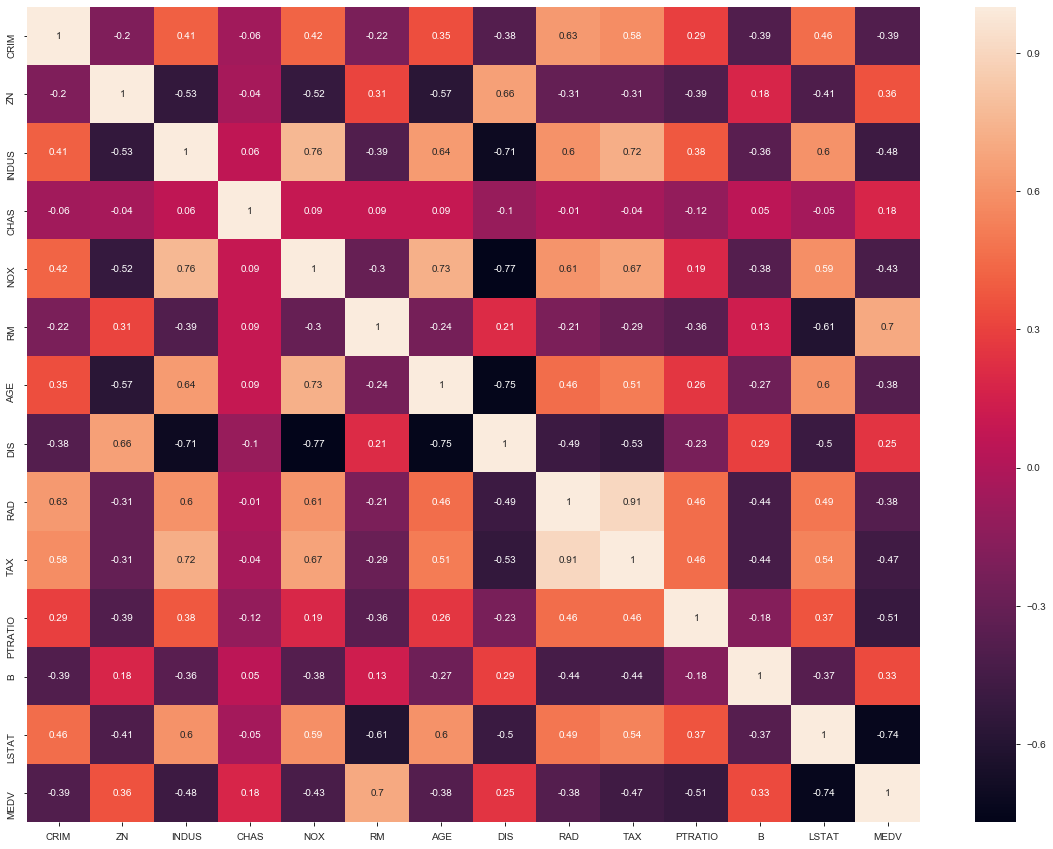

In [42]:
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(data=correlation_matrix, annot=True)

**Конечно было бы правильно - для наших множественных линейных регрессионных моделей - оценивать значимость коэффициентов регрессионной модели. И тогда можно было бы обоснованно исключать рассматриваемые факторы. 
В стандартной библиотеке о точности коэфициентов регрессионных моделей мне не удалось найти информацию.**

In [207]:
import pandas_profiling

In [208]:
data.profile_report()